# Climate Detectives: Mapping Sampling Sites

## Introduction
As isotope scientists we analyse water from all over the world and one of our projects at the Water Isotope Lab at UBC is to make an isotope map of Canada. Today we're going to be looking at 11 samples from South Western Canada that were collected between November 2024 and June 2025. In this notebook we're going to be making a map of all of the sampling locations using python code.

## Sampling Sites
> - Victoria, BC
> - Sooke, BC
> - Vancouver, BC
> - Chilliwak, BC
> - Osoyoos, BC
> - Castlegar, BC
> - Creston, BC
> - Cranbrook, BC
> - The Crows Nest Pass, AB
> - Lethbridge, AB
> - Medicine Hat, AB
> - Calgary, AB

We start by importing the libraries that we'll need to make our dataframe and map. Libraries are many functions that allow us as researchers to access functions that we would have otherwise had to make ourselves. 

In [10]:
#import libraries
import numpy as np #array manipulation
import pandas as pd #data manipulation package
import cartopy.crs as ccrs #package that lets you make cool maps
import matplotlib.pyplot as plt #standard plotting package for python

### (1) 
Start by finding the coordinates of each of the sampling sites using https://www.geodatos.net/en/coordinates/canada/ and enter the decimal coordinates into the spaces provided. 
 Run the cell to make a dataframe of all of our samples.

In [88]:
#make a samplelog dataframe
columns = ["location_id", "lat", "lon"]
#Victoria
vic_lat = 1 #change this
vic_lon = 1 #and this
vic = pd.DataFrame(data = {columns[0]:"VIC", columns[1]: vic_lat, columns[2]: vic_lon}, index = np.arange(1))

#Sooke
ske_lat = 1 #and this
ske_lon = 1 #aaand this
ske = pd.DataFrame(data = {columns[0]:"SKE", columns[1]: ske_lat, columns[2]: ske_lon}, index = np.arange(1))

#Vancouver
van_lat = 1 #you get the picture
van_lon = 1 
van = pd.DataFrame(data = {columns[0]:"VAN", columns[1]: van_lat, columns[2]: van_lon}, index = np.arange(1))

#Chilliwak
chil_lat = 1 
chil_lon = 1 
chil = pd.DataFrame(data = {columns[0]:"CHIL", columns[1]: chil_lat, columns[2]: chil_lon}, index = np.arange(1))

#Osoyoos
osoy_lat = 1 
osoy_lon = 1 
osoy = pd.DataFrame(data = {columns[0]:"OSOY", columns[1]: osoy_lat, columns[2]: osoy_lon}, index = np.arange(1))

#Castlegar
cast_lat = 1 
cast_lon = 1 
cast = pd.DataFrame(data = {columns[0]:"CAST", columns[1]: cast_lat, columns[2]: cast_lon}, index = np.arange(1))

#Creston
cres_lat = 1 
cres_lon = 1 
cres = pd.DataFrame(data = {columns[0]:"CRES", columns[1]: cres_lat, columns[2]: cres_lon}, index = np.arange(1))

#Cranbrook
cran_lat = 1 
cran_lon = 1 
cran = pd.DataFrame(data = {columns[0]:"CRAN", columns[1]: cran_lat, columns[2]: cran_lon}, index = np.arange(1))

#Crows Nest Pass
crow_lat = 1 
crow_lon = 1 
crow = pd.DataFrame(data = {columns[0]:"CROW", columns[1]: crow_lat, columns[2]: crow_lon}, index = np.arange(1))

#Lethbridge
leth_lat = 1 
leth_lon = 1 
leth = pd.DataFrame(data = {columns[0]:"LETH", columns[1]: leth_lat, columns[2]: leth_lon}, index = np.arange(1))

#Medicine Hat
med_lat = 1 
med_lon = 1 
med = pd.DataFrame(data = {columns[0]:"MED", columns[1]: med_lat, columns[2]: med_lon}, index = np.arange(1))

#Calgary
cal_lat = 1 
cal_lon = 1 
cal = pd.DataFrame(data = {columns[0]:"CAL", columns[1]: cal_lat, columns[2]: cal_lon}, index = np.arange(1))

Here we're putting all of the small dataframes together to make one big dataframe. The dataframe gets saved as a csv (comma separated value) file so that we can load it into different coding files without having to go through that whole process again. In essence, we just made a spreadsheet using python code!

In [92]:
#add all of these into one big dataframe that we can workwith
sample_locations = pd.concat([vic, ske, van, chil, osoy, cast, cres, cran, crow, leth, med, cal], ignore_index = True)
#now we're going to save it as a csv file so that we don't have to do this all the time
sample_locations.to_csv("sample_locations.csv")
sample_locations

,location_id,lat,lon
0,VIC,1,1
1,SKE,1,1
2,VAN,1,1
3,CHIL,1,1
4,OSOY,1,1
5,CAST,1,1
6,CRES,1,1
7,CRAN,1,1
8,CROW,1,1
9,LETH,1,1


### (2) 
Next, we're going to read in our brand new dataframe and use it to plot a map of all of our sampling locations. For this part we're using the libraries matplotlib and cartopy which make fun plots and maps. You don't have to understand every line of this code, we've done the fine tuning of all of the labels and plotting extras to save time. The code is annotated so explain what each section does but if you have questions just ask :) 

In [93]:
#load in our new dataset so that we can workwith it
sample_locations = pd.read_csv("sample_locations.csv")

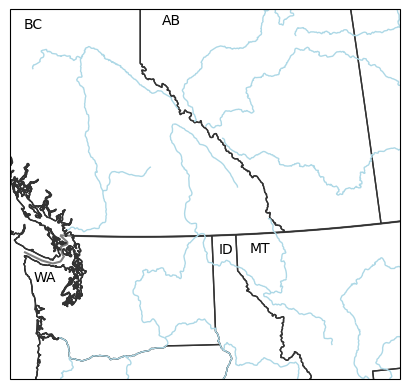

In [96]:
#make a map of the sample locations
ax = plt.subplot(1,1,1, projection = ccrs.Orthographic(central_longitude= 240, central_latitude=39))

#this code sets up the map so that we can see where each sample is
ax.set_extent([-125, -110, 45, 55])
ax.coastlines() #adds the coastline
ax.add_feature(cartopy.feature.BORDERS, linewidth=1.5, edgecolor = "0.5") #adds the border between Canada and the US
ax.add_feature(cartopy.feature.STATES, edgecolor = "0.2") #adds provincal and state borders
ax.add_feature(cartopy.feature.RIVERS, edgecolor = "lightblue") #adds the rivers

#add labels for the provinces and states
ax.annotate("BC", xy = (-125.5, 54.7), transform = ccrs.PlateCarree())
ax.annotate("AB", xy = (-119, 54.9), transform = ccrs.PlateCarree())
ax.annotate("WA", xy = (-124.3, 47.7), transform = ccrs.PlateCarree())
ax.annotate("MT", xy = (-115.5, 48.5), transform = ccrs.PlateCarree())
ax.annotate("ID", xy = (-116.8, 48.5), transform = ccrs.PlateCarree())

#add dots where each sample was collected
plt.scatter(sample_locations["lon"], sample_locations["lat"], transform = ccrs.PlateCarree(), color = "blueviolet", marker = ".")
#If you want to change the color of the dots, change what comes after the "color = " section in the above line of code
#changing what comes after the "marker = " will change what gets plotted as the "dot", If you want stars, change it to "*", triangles? "v"

#save the figure as a png file
plt.savefig("sample_map.png")